# Analysis of an experiment demo

In [1]:
from midastouch.analyzer import Analyzer
import os

Choose an experiment that we want to analyze and load the data:

In [2]:
dir = os.getcwd()
a = Analyzer(datadir=dir+'/experiment_2021-12-17_22_43_07.csv',
            paramdir=dir+'/params_2021-12-17_22_43_07.py')
a.load_data()

The parameters of the algorihtm can be retrieved by the following command:

In [3]:
a.get_parameters()

{'before_after_weights': {'before': 4, 'same time': 2, 'after': 1},
 'decay': 'exponential',
 'max_dist': 3,
 'n_investments': 30,
 'cvg_thresh': 0.001}

The following function gives back the top ranked investors. The rank is supposed to represent how 'related' they are to brand-name investors (which have a score of 1 by definition).

In [4]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,"{'NFX': 10, 'REV': 34, 'Google': 37, 'ZhenFund..."
357,Mayfield Fund,1.000000,0,607,"{'Fuse Capital': 44, 'Accel': 109, 'Sapphire':..."
93,Elad Gil,1.000000,0,116,"{'Group 11': 43, 'Base Partners': 10, 'Zeev Ve..."
1079,Floodgate,1.000000,0,340,"{'Cherry Tree Investments': 46, 'Shasta Ventur..."
430,Menlo Ventures,1.000000,0,687,"{'TCV': 25, 'Cross Creek': 13, 'Spark Capital'..."
1682,DCVC,1.000000,0,434,"{'GIC': 16, 'Battery Ventures': 40, 'Instituti..."
1872,Eric Ries,1.000000,0,51,"{'DCVC': 6, 'Pear VC': 20, 'HAX': 10, 'SOSV': ..."
383,True Ventures,1.000000,0,589,"{'REV': 23, 'Intel Capital': 46, 'G Squared': ..."
348,Intel Capital,1.000000,0,1488,"{'TPG Growth': 37, 'Sprout Group': 65, 'Sapphi..."
1059,CRV,1.000000,0,594,"{'Matrix Partners': 294, 'Tudor Growth Equity'..."


We can also look at how many investors there are between in any range of scores:

In [5]:
bottom_score = 0.3
top_score = 0.4
print(f'There are {a.investor_count(bottom_score=0.3,top_score=0.4)} investors with score between {bottom_score} and {top_score}')

There are 721 investors with score between 0.3 and 0.4


and plot it on a bar chart.

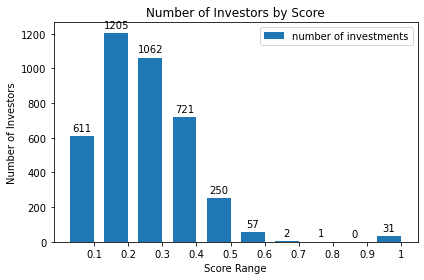

In [6]:
a.investor_count_chart()

Looking at the ranking of a sample of well-known investors is a gut-check of our ranking algorithm. 

In [7]:
a.investor_sample()

,investor_name,score,distance,investments,neighbors
173,Bill Gates,0.504099,1,68,"{'G Squared': 5, 'Alexis Ohanian': 10, 'Pario ..."
2481,Ridge Ventures,0.433759,1,169,"{'Ulu Ventures': 8, 'CRV': 40, 'Arbor Ventures..."
2070,Peter Thiel,0.412992,1,87,"{'8VC': 10, 'GV': 13, 'Google': 2, 'HOF Capita..."
1219,M12 - Microsoft's Venture Fund,0.384760,1,227,"{'Sapphire': 21, 'DFJ Growth': 20, 'Mayfield F..."
315,Y Combinator,0.378936,1,4189,"{'Accel': 669, 'Stripe': 39, 'Latitude': 5, 'C..."
607,WestWave Capital,0.360481,1,62,"{'FOUNDER.org': 4, 'MIG': 8, 'Floodgate': 4, '..."
3007,Redpoint eventures,0.358353,1,94,"{'500 Startups': 29, 'Founders Fund': 15, 'VEF..."
1202,Earlybird Venture Capital,0.260280,1,271,"{'Greenspring Associates': 5, 'Saints Capital'..."
251,500 Startups,0.251685,1,2684,"{'Zeroth.AI': 4, 'FBG Capital': 7, '8 Decimal ..."
1155,Commerce Ventures,0.246198,1,131,"{'West Capital Advisors': 6, 'Burch Creative C..."


If one wants to do a further analysis then they can do so by analyzing the full dataset and the full graph of connections which can be obtained by the following commands.

In [11]:
df = a.get_data()

## Choosing a different experiment file

Note, to choose a different experiment, just change the timestamp manually in the second cell. Alternatively, run the following code to choose the file paths

### If you want to choose a different experiment .csv file run the following code

In [7]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

datadir = filenames[0]

### If you want to choose a different params .py file run the following code

In [8]:
try:
    from tkinter import Tk
    from tkFileDialog import askopenfilenames
except:
    from tkinter import Tk
    from tkinter import filedialog

Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
filenames = filedialog.askopenfilenames() # show an "Open" dialog box and return the path to the selected file

paramdir = filenames[0]

In [9]:
a = Analyzer(datadir=datadir, paramdir=paramdir)
a.load_data()

In [10]:
a.get_parameters()

{'before_after_weights': {'before': 1, 'same time': 1, 'after': 1},
 'decay': 'linear',
 'max_dist': 3,
 'n_investments': 30,
 'cvg_thresh': 0.001}

In [11]:
a.investor_ranking(top_n=100)

,investor_name,score,distance,investments,neighbors
0,GV,1.000000,0,914,"{'NFX': 6, 'REV': 14, 'Google': 15, 'ZhenFund'..."
570,General Catalyst,1.000000,0,994,"{'Accel': 198, 'WndrCo': 7, 'Crowdcube': 22, '..."
564,Felicis Ventures,1.000000,0,527,"{'Sapphire': 33, 'Skip Capital': 25, 'Index Ve..."
702,Foundation Capital,1.000000,0,648,"{'DHVC': 23, 'ZhenFund': 2, 'GGV Capital': 25,..."
549,Battery Ventures,1.000000,0,778,"{'ESO Fund': 17, 'PremjiInvest': 6, 'Icon Vent..."
729,Andreessen Horowitz,1.000000,0,1110,"{'Accel': 140, 'Goldman Sachs': 39, 'Index Ven..."
740,First Round Capital,1.000000,0,821,"{'GV': 149, 'TPG Biotech': 20, 'Foresite Capit..."
528,Sequoia Capital,1.000000,0,1601,"{'Alumni Ventures': 13, 'Tenaya Capital': 140,..."
830,Union Square Ventures,1.000000,0,363,"{'SV Angel': 145, 'Lux Capital': 45, 'George B..."
510,Kleiner Perkins,1.000000,0,1310,"{'TCV': 35, 'Accel': 134, 'Focus Ventures': 69..."
